# Introduction
In this notebook, we will execute/answer all the 12 questions asked in the project phase1 pdf file. We will perform EDA on the KPMG-Company-Dataset.

Group members:
1. Amaan Izhar - 201781130 
2. Farhan Abdul Qadir - 201771950
3. Abduljawad Mohammad - 201744310 

# Imports

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Q1. Description of the dataset

The KPMG-Company Datasets are a group of raw datasets consisting of the company's financial and customer information pertaining to transactions, profits, and demographics. We will use only the **transactions** sheet of the excel file.
Columns:
- transaction_id = an id of the transaction
- product_id = an id of the product
- customer_id = an id of the customer
- transaction_data - the date on which transaction was placed
- online_order - if the order was online or not
- order_status - whether the order was approved
- brand - the brand of the product
- product_line - what product category is it? 
- product_class - the class of product
- product_size - the size of product
- list_price - the price of product
- standard_cost - the standard cost of the product
- profit - how much profit did the product made
- product_first_sold_date - the date on which it was first sold.

# EDA

In [3]:
df = pd.read_excel(io='kpmg_rawdata.xlsx', sheet_name='Transactions') 
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,NaN,41245
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03 00:00:00
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,NaN,36361
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,NaN,36145
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,2015-08-10 00:00:00


In [4]:
print(f'Total Rows = {df.shape[0]} | Total Columns = {df.shape[1]}')
print(f'Columns = {df.columns}')

Total Rows = 20000 | Total Columns = 14
Columns = Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'profit', 'product_first_sold_date'],
      dtype='object')


## Q2.a - Print the data type of at least three columns
We will print the data types of **all** columns.

In [5]:
df.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
profit                            float64
product_first_sold_date            object
dtype: object

## Q2.b - Handle missing data of a column; for example, by mean or median

In [6]:
print('Total number of NAN or missing values in each columns are:')
df.isna().sum()

Total number of NAN or missing values in each columns are:


transaction_id                 0
product_id                     0
customer_id                    0
transaction_date               0
online_order                 360
order_status                   0
brand                        197
product_line                 197
product_class                197
product_size                 197
list_price                     0
standard_cost                197
profit                     10261
product_first_sold_date      197
dtype: int64

In the context of the dataset, we will replace missing values of the column **'profit'** and **'standard_cost'** with **mean**.

In [7]:
count_na_before = df['profit'].isna().sum()
print(f'#missing values = {count_na_before}.')

mean = df['profit'].mean()
print(f'Mean of <profit> column = {mean}.')
print(f'Filling <profit> column with mean.')
df['profit'] = df['profit'].fillna(mean)

count_na_after = df['profit'].isna().sum()
print(f'#missing values after filling with mean = {count_na_after}.')

df['profit']

#missing values = 10261.
Mean of <profit> column = 548.405040558579.
Filling <profit> column with mean.
#missing values after filling with mean = 0.


0         548.405041
1        1702.550000
2         548.405041
3         548.405041
4        1055.820000
            ...     
19995     802.260000
19996     104.240000
19997    1592.190000
19998     548.405041
19999     195.340000
Name: profit, Length: 20000, dtype: float64

In [8]:
count_na_before = df['standard_cost'].isna().sum()
print(f'#missing values = {count_na_before}.')

mean = df['standard_cost'].mean()
print(f'Mean of <standard_cost> column = {mean}.')
print(f'Filling <standard_cost> column with mean.')
df['standard_cost'] = df['standard_cost'].fillna(mean)

count_na_after = df['standard_cost'].isna().sum()
print(f'#missing values after filling with mean = {count_na_after}.')

df['standard_cost']

#missing values = 197.
Mean of <standard_cost> column = 556.0469512209312.
Filling <standard_cost> column with mean.
#missing values after filling with mean = 0.


0          53.62
1         388.92
2         248.82
3         381.10
4         709.48
          ...   
19995    1203.40
19996     312.74
19997      44.71
19998     136.73
19999    1580.47
Name: standard_cost, Length: 20000, dtype: float64

## Q2.c - Use one hot encoding to convert a nominal column.
We will convert **brand** column into one-hot-encoding.

In [9]:
encodings_df = pd.get_dummies(df.brand)
encodings_df.head()

,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [10]:
df = pd.concat([df, encodings_df], axis=1)
df = df.drop(labels=['brand'], axis=1)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
0,1,2,2950,2017-02-25,0.0,Approved,Standard,medium,medium,71.49,53.62,548.405041,41245,0,0,0,1,0,0
1,2,3,3120,2017-05-21,1.0,Approved,Standard,medium,large,2091.47,388.92,1702.550000,2014-03-03 00:00:00,0,0,0,0,1,0
2,3,37,402,2017-10-16,0.0,Approved,Standard,low,medium,1793.43,248.82,548.405041,36361,0,0,1,0,0,0
3,4,88,3135,2017-08-31,0.0,Approved,Standard,medium,medium,1198.46,381.10,548.405041,36145,0,1,0,0,0,0
4,5,78,787,2017-10-01,1.0,Approved,Standard,medium,large,1765.30,709.48,1055.820000,2015-08-10 00:00:00,1,0,0,0,0,0


## Q2.d - Convert an ordinal column to a numeric column
We will use **product_class** column.

In [11]:
df['product_class'].value_counts().keys()

Index(['medium', 'high', 'low'], dtype='object')

In [12]:
df['product_class'].isna().sum()
df['product_class'] = df['product_class'].fillna('medium')

In [13]:
ordinal_scores = {'low': 0, 'medium': 0.5, 'high': 1}
df['product_class'] = df['product_class'].apply(lambda rank: ordinal_scores[rank])
df['product_class']

0        0.5
1        0.5
2        0.0
3        0.5
4        0.5
        ... 
19995    1.0
19996    0.5
19997    0.5
19998    1.0
19999    0.5
Name: product_class, Length: 20000, dtype: float64

In [14]:
df['product_class'].value_counts()

0.5    14023
1.0     3013
0.0     2964
Name: product_class, dtype: int64

In [15]:
df.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
0,1,2,2950,2017-02-25,0.0,Approved,Standard,0.5,medium,71.49,53.62,548.405041,41245,0,0,0,1,0,0
1,2,3,3120,2017-05-21,1.0,Approved,Standard,0.5,large,2091.47,388.92,1702.550000,2014-03-03 00:00:00,0,0,0,0,1,0
2,3,37,402,2017-10-16,0.0,Approved,Standard,0.0,medium,1793.43,248.82,548.405041,36361,0,0,1,0,0,0
3,4,88,3135,2017-08-31,0.0,Approved,Standard,0.5,medium,1198.46,381.10,548.405041,36145,0,1,0,0,0,0
4,5,78,787,2017-10-01,1.0,Approved,Standard,0.5,large,1765.30,709.48,1055.820000,2015-08-10 00:00:00,1,0,0,0,0,0
5,6,25,2339,2017-03-08,1.0,Approved,Road,0.5,medium,1538.99,829.65,709.340000,2006-11-10 00:00:00,1,0,0,0,0,0
6,7,22,1542,2017-04-21,1.0,Approved,Standard,0.5,medium,60.34,45.26,15.080000,1993-07-15 00:00:00,0,0,0,0,0,1
7,8,15,2459,2017-07-15,0.0,Approved,Standard,0.5,medium,1292.84,13.44,548.405041,39915,0,0,0,0,0,1
8,9,67,1305,2017-08-10,0.0,Approved,Standard,0.5,large,1071.23,380.74,548.405041,33455,0,0,0,1,0,0
9,10,12,3262,2017-08-30,1.0,Approved,Standard,0.5,medium,1231.15,161.60,1069.550000,2004-08-17 00:00:00,0,0,0,0,0,1


## Q2.e Perform Normalization (MinMax)

    - We will perform minmax normalization on 'list_Price', 'standard_ cost', and 'Profit'.

In [16]:
minMaxList = ['list_price', 'standard_cost']

for colName in minMaxList:
    df[colName] = (df[colName]-df[colName].min()) / (df[colName].max()-df[colName].min())

In [17]:
df.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
0,1,2,2950,2017-02-25,0.0,Approved,Standard,0.5,medium,0.028604,0.026480,548.405041,41245,0,0,0,1,0,0
1,2,3,3120,2017-05-21,1.0,Approved,Standard,0.5,large,1.000000,0.217791,1702.550000,2014-03-03 00:00:00,0,0,0,0,1,0
2,3,37,402,2017-10-16,0.0,Approved,Standard,0.0,medium,0.856674,0.137855,548.405041,36361,0,0,1,0,0,0
3,4,88,3135,2017-08-31,0.0,Approved,Standard,0.5,medium,0.570557,0.213330,548.405041,36145,0,1,0,0,0,0
4,5,78,787,2017-10-01,1.0,Approved,Standard,0.5,large,0.843147,0.400693,1055.820000,2015-08-10 00:00:00,1,0,0,0,0,0
5,6,25,2339,2017-03-08,1.0,Approved,Road,0.5,medium,0.734316,0.469258,709.340000,2006-11-10 00:00:00,1,0,0,0,0,0
6,7,22,1542,2017-04-21,1.0,Approved,Standard,0.5,medium,0.023242,0.021710,15.080000,1993-07-15 00:00:00,0,0,0,0,0,1
7,8,15,2459,2017-07-15,0.0,Approved,Standard,0.5,medium,0.615944,0.003555,548.405041,39915,0,0,0,0,0,1
8,9,67,1305,2017-08-10,0.0,Approved,Standard,0.5,large,0.509373,0.213124,548.405041,33455,0,0,0,1,0,0
9,10,12,3262,2017-08-30,1.0,Approved,Standard,0.5,medium,0.586277,0.088090,1069.550000,2004-08-17 00:00:00,0,0,0,0,0,1


## Q2.f Compute Five number Summary of a numeric Column
    - We will use the 'Profit' Column for 5 Number summary computation

In [18]:
# 5 NUMBER SUMMARY
quartiles = np.percentile(df['profit'], [25, 50, 75 ])

print('Minimum: ', df['profit'].min())
print('1st Quartile: ', quartiles[0])
print('Median: ', quartiles[1])
print('3rd Quartile', quartiles[2])
print('Maximum: ', df['profit'].max())

Minimum:  4.8
1st Quartile:  448.67999999999995
Median:  548.405040558579
3rd Quartile 548.405040558579
Maximum:  1702.5499999999997


## Q2.g  Computing Basic Statistics for Profit Column

In [19]:
column = 'profit'

print(f'{column} Statistics')
print('Count:              ',len(df[column]))
print('Mean:               ',df[column].mean())
print('Median:             ',df[column].median())
print('Mode:               ',list(df[column].mode()))
print('Max:                ',df[column].max())
print('Min:                ',df[column].min())
print('Standard Deviation: ',df[column].std())
print('Range:              ',df[column].max() - df[column].min())

profit Statistics
Count:               20000
Mean:                548.4050405585788
Median:              548.405040558579
Mode:                [548.405040558579]
Max:                 1702.5499999999997
Min:                 4.8
Standard Deviation:  343.73297935478604
Range:               1697.7499999999998


## Q2.h  Distinct values in a categorical column



In [20]:
print(df.product_line.dropna().unique())

['Standard' 'Road' 'Mountain' 'Touring']


## Q2.i  Handling outliers

In [39]:
Q1 = quartiles[0]
Q3 = quartiles[2]
IQR = Q3-Q1
low_lim, upper_lim = Q1 - 1.5*IQR, Q3 + 1.5*IQR
print("IQR for profit =", IQR)
print(f"Lower limit of outlier = {low_lim} | Upper limit of outlier = {upper_lim}")
df1 = df[(df['profit'] < upper_lim) & (df['profit'] > low_lim)]
df1['profit'].value_counts()

IQR for profit = 99.72504055857905
Lower limit of outlier = 299.09243916213137 | Upper limit of outlier = 697.9926013964475


548.405041    41044
448.680000      760
451.650000      476
437.460000      476
502.470000      432
445.210000      428
450.770000      408
509.970000      404
690.490000      404
583.270000      400
409.860000      396
693.760000      388
641.640000      380
431.330000      380
309.810000      376
471.600000      372
327.980000      360
459.460000      360
547.280000      352
574.620000      344
356.500000      336
299.270000      324
456.450000      276
Name: profit, dtype: int64

In [40]:
df1.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
0,1,2,2950,2017-02-25,0.0,Approved,Standard,0.5,medium,0.028604,0.026480,548.405041,41245,0,0,0,1,0,0
2,3,37,402,2017-10-16,0.0,Approved,Standard,0.0,medium,0.856674,0.137855,548.405041,36361,0,0,1,0,0,0
3,4,88,3135,2017-08-31,0.0,Approved,Standard,0.5,medium,0.570557,0.213330,548.405041,36145,0,1,0,0,0,0
7,8,15,2459,2017-07-15,0.0,Approved,Standard,0.5,medium,0.615944,0.003555,548.405041,39915,0,0,0,0,0,1
8,9,67,1305,2017-08-10,0.0,Approved,Standard,0.5,large,0.509373,0.213124,548.405041,33455,0,0,0,1,0,0
10,11,5,1986,2017-01-17,0.0,Approved,Mountain,0.0,medium,0.270565,0.258182,548.405041,40784,0,0,0,0,1,0
13,14,16,2717,2017-09-10,0.0,Approved,Standard,1.0,small,0.793432,0.839819,548.405041,34586,0,1,0,0,0,0
14,15,12,247,2017-06-11,0.0,Approved,Standard,0.5,large,0.843147,0.400693,548.405041,38193,1,0,0,0,0,0
15,16,3,2961,2017-10-10,0.0,Approved,Standard,0.5,large,1.000000,0.217791,548.405041,37873,0,0,0,0,1,0
16,17,79,2426,2017-04-03,0.0,Approved,Standard,0.5,medium,0.742294,0.462616,548.405041,38206,0,1,0,0,0,0


## Q2.j  Visualization


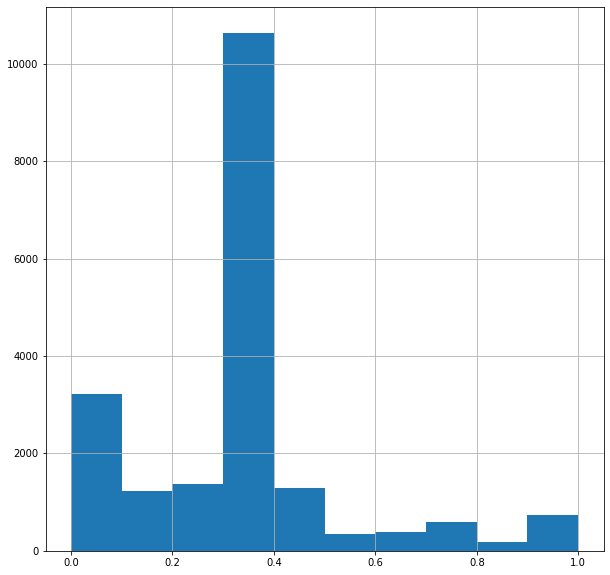

In [54]:
histogram = df["profit"].hist(figsize=(10,10))


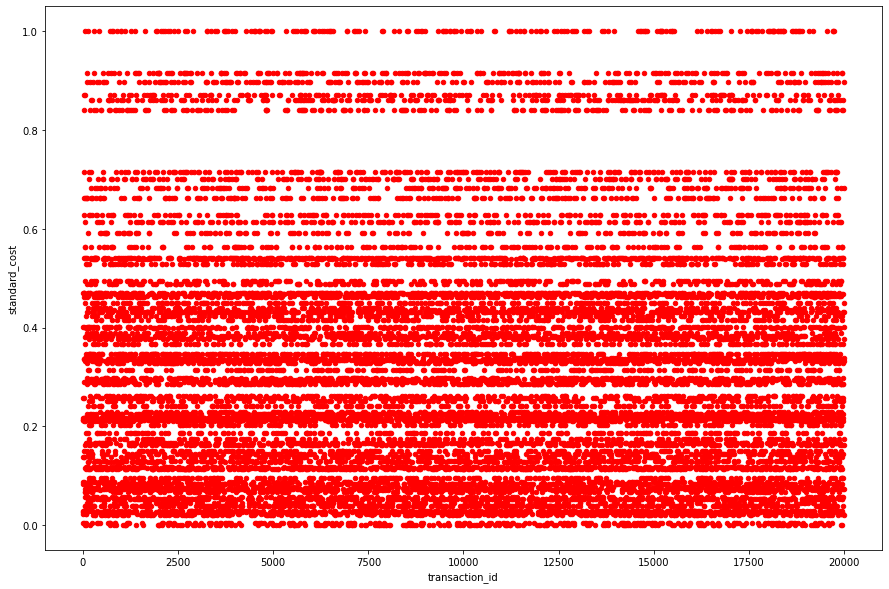

In [62]:
scplot = df.plot.scatter(x="transaction_id", y="standard_cost", c="red",figsize=(15,10))

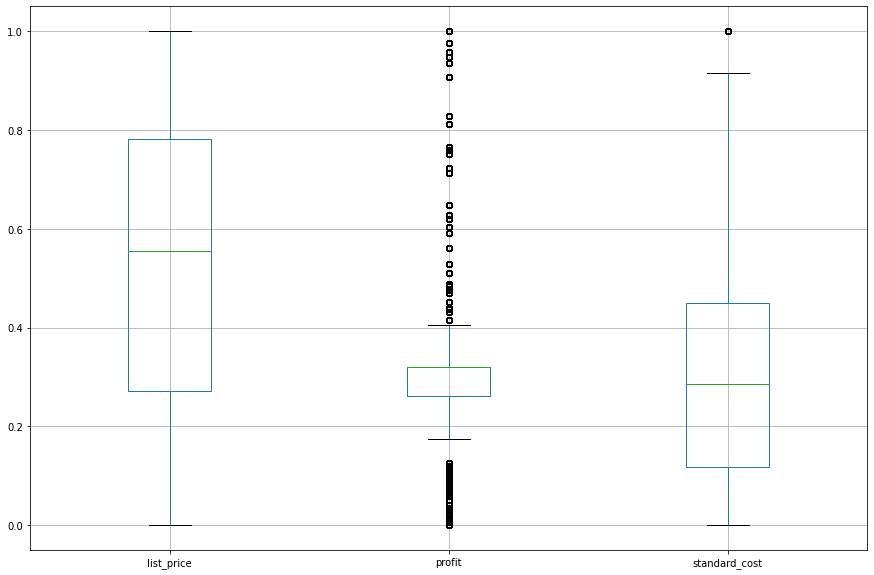

In [58]:
boxplot = df.boxplot(column=['list_price','profit','standard_cost'], figsize=(15,10))

## Q2.k  Creating X and Y and splitting into train test


In [69]:
trainset, testset = train_test_split(df, test_size=0.2)
print(trainset.head(10))
print(testset.head(10))

       transaction_id  product_id  customer_id  ... Solex  Trek Bicycles WeareA2B
4608             4609          20          248  ...     0              1        0
8011             8012           5         3359  ...     0              1        0
13015           13016          78         2464  ...     0              0        0
1500             1501          52         2457  ...     1              0        0
3757             3758           1         2570  ...     0              0        0
5712             5713          54         3460  ...     0              0        1
1762             1763           1         2486  ...     0              0        0
3218             3219          19          477  ...     0              1        0
15930           15931          78         2504  ...     0              0        0
6311             6312          99          829  ...     0              1        0

[10 rows x 19 columns]
       transaction_id  product_id  customer_id  ... Solex  Trek Bicycles W

In [72]:
print("Size of Train set =", len(trainset))
print("Size of Test set =", len(testset))

Size of Train set = 16000
Size of Test set = 4000
